# Lab 2: Newton's law of cooling

 
## The Euler Algorithm

The standard technique for the numerical solution of differential equations involves the conversion of a differential equation to a *finite difference* equation.

**Example:** The rate of heat loss of a body is proportional to the difference in temperatures between the body $(T)$ and its surroundings $(T_s)$.

$$\frac{dT}{dt} = -R(T-T_s)$$

where $R$ is the cooling constant and $T_s$ is the "surrounding" temperature.
 
If we take a uniform time step $\Delta t$, then this iterative solution can be written, more compactly, as the **Euler Algorithm**, or

$$t^n = t^{n-1} + \Delta t$$

$$T^n  = T^{n-1} - R (T^{n-1} - T_s) \Delta t$$

where $n$ is an integer for the time step.  (Note that we use *superscript* $n$ to indicate the time step.  Later we will use *subscript* to denote the spatial index on a grid.)




## Coffee cooling problem

- Write a program to solve the coffee cup cooling problem using the Euler method, i.e., 
\begin{equation}
\frac{dT(t)}{dt} = -R [T(t) - T_A] \nonumber
\end{equation}
where $T(t)$ is the temperature of water at time $t$, $T_A$ is the temperature of air, and $R$ is the cooling constant. 

- Use your program to determine $R$ for the experimental data in Table
below for cooling of a cup of coffee in a ceramic mug (the air temperature was 22.0 $^\circ$C).  Since time is measured in minutes, the units of the cooling constant $R$ are min$^{-1}$.  Do several runs with smaller and smaller time intervals
until the results look like they are converging.  Include a graph of
your final simulation results along with the data.  Describe any difficulties in fitting the data and mitigation strategies.


|$t$ (min) | $T$ ($^\circ$C) |
|----------:|-----------:|
|0 | 83.0 |
|1.0 | 77.7 |
|2.0 | 75.1 |
|3.0 | 73.0 |
|4.0 | 71.1 |
|5.0 | 69.4 |
|6.0 | 67.8 |
|7.0 | 66.4 |
|8.0 | 64.7 |
|9.0 | 63.4 |
|10.0 | 62.1 |
|11.0 | 61.0 |
|12.0 | 59.9 |
|13.0 | 58.7 |
|14.0 | 57.8 |
|15.0 | 56.6 |

- The boundary layer model for a water/air interface predicts
\begin{equation}
R = \frac{\kappa A}{MC \Delta x} \nonumber
\end{equation}
where $\kappa$ is the thermal conductivity of air (0.0237
W/m$~^\circ$C), $A$ is the surface area of the water, $M$ is the mass
of the water, $C$ is the specific heat of water ($4.19 \times 10^3$
J/kg $^\circ$C), and $\Delta x$ is the thickness of the boundary
layer.  Estimate $M$ and $A$ for a typical cup of coffee and find
$\Delta x$. 




delta_x is equal to:
0.0005829362807554814


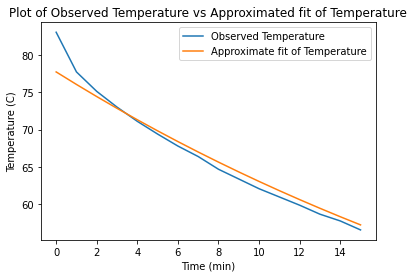

In [2]:
#---------------------------------------------------------------------------------
#Coffee cup cooling problem
#Name: Hunter Barndt
#Lab partner: None
#Date: 1/21/21
#---------------------------------------------------------------------------------

###Import necessary modules
import numpy as np
from matplotlib import pyplot as plt

##Data for data-based temperature plot:

#Time Data from 0 to 15 (in minutes)
timespc1 = np.linspace(0,15,16)
#Temperature Data
TemperatureData = np.array([83,77.7,75.1,73,71.1,69.4,67.8,66.4,64.7,63.4,62.1,61,59.9,58.7,57.8,56.6])

#Variables for finding delta_x:
M = 0.007 #in kg
C = 4.19*(10**3) #in J/kg C
A = np.pi*(0.083**2)
k = 0.0237 #in W/m C
    
#Function: Cooling Cup ODE Solver
#Inputs: Initial temperature, Cooling constant, size of time step
def CoolCupEulerMethod(num_intervals,T0,R):
    #Time Space from 0 to 15 (in minutes) [time step size editable]
    timespc = np.linspace(0,15,num_intervals)
    #Solution Space for Computed Fit
    CompTemp = np.zeros(num_intervals)
    #Setting initial temp
    CompTemp[0] = T0
    #Delta time: time's step-size
    dt = timespc[1] - timespc[0]
    for i in range(0,num_intervals-1):
      CompTemp[i+1] = CompTemp[i] - R*(CompTemp[i] - 22)*(dt)
    return CompTemp

#Estimated R with initial data point
R = 0.03
#Estimated R without initial data point
#R = -0.042
T0 = 77.7 #(initial temperature)
n = 16

Computed_Temperature = CoolCupEulerMethod(n,T0,R)

#If R is equal to approx -0.042, then:
delta_x = (k*A)/(R*M*C)
print("delta_x is equal to:")
print(delta_x)

#Plot results
plt.title("Plot of Observed Temperature vs Approximated fit of Temperature")
plt.xlabel("Time (min)")
plt.ylabel("Temperature (C)")
plt.plot(timespc1,TemperatureData, label='Observed Temperature')
plt.plot(np.linspace(0,15,len(Computed_Temperature)),Computed_Temperature, label='Approximate fit of Temperature')
plt.legend()

## ODE in dimensionless form

Write a new version of the cooling law ODE code in dimensionless form.
That is, solve the following ODE of the form  
\begin{equation}
 \frac{dy}{d \tau} = -y \nonumber
\end{equation}
choosing normalizing factors so that $y(0) = 1$ and $y(\tau) = e^{-\tau}$.

- What value of $\Delta \tau$ is necessary for an accuracy of 0.02\% at $\tau =
1$?

- Apply the physical constrains to verify that the dimensionless version can reproduce the results from above, i.e., you will have to "reconstitute" the dimensions using the normalization parameters. 

**Derivation (Coffee cooling problem, ODE)**


- Dimensionless time

\begin{equation*}
\tau = \frac{t}{t_o}
\end{equation*}
 
- Dimensionless temperature

\begin{equation*}
y = \frac{T(t) - T_A}{T_o}
\end{equation*}


\begin{equation*}
dt  = t_o d\tau, ~~dT = T_o dy
\end{equation*}

\begin{equation*}
\frac{dT}{dt} = \frac{T_o dy}{t_o d\tau} = -R(T - T_A) = -R T_o y
\end{equation*}

\begin{equation*}
\frac{dy(\tau)}{d\tau} = -(t_o R) y(\tau)
\end{equation*}

Let $t_o = 1/R$, $T(0) = T_i$ so that $y(0) = (T_i- T_A)/T_o$.  If $y(0) = 1$ then $T_o = T_i - T_A$.

\begin{equation*}
\frac{dy(\tau)}{d\tau} = -y(\tau)
\end{equation*}





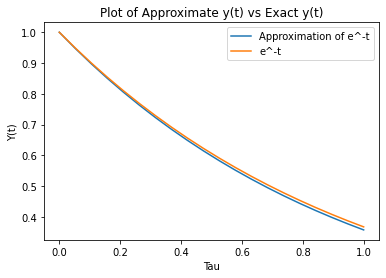

In [3]:
###Dimensionless ODE

#Function: Cooling Cup ODE Solver
#Inputs: Initial temperature, Cooling constant, size of time step
def CoolCupDimensionlessEulerMethod(num_intervals,y0):
    #Time Space from 0 to 1 (in minutes) [time step size editable]
    timespc = np.linspace(0,1,num_intervals)
    #Solution Space for Computed Fit
    y_approx = np.zeros(num_intervals)
    #Setting initial temp
    y_approx[0] = y0
    #Delta time: time's step-size
    dtau = timespc[1] - timespc[0]
    for i in range(0,num_intervals-1):
      y_approx[i+1] = y_approx[i] + (-y_approx[i]*(dtau))
    return y_approx
    
y0 = 1 #(initial temperature)
num_intervals = 20 #Increase the number of intervals to get a more exact 
y_approximation = CoolCupDimensionlessEulerMethod(num_intervals,y0)

tau = np.linspace(0,1,num_intervals)
tau_real = np.linspace(0,1,20)
y = np.exp(-tau_real)

plt.title("Plot of Approximate y(t) vs Exact y(t)")
plt.xlabel("Tau")
plt.ylabel("Y(t)")
plt.plot(tau,y_approximation, label='Approximation of e^-t')
plt.plot(tau_real,y, label='e^-t')
plt.legend()


## Truncation Error

Since we have replaced a differential equation by a difference equation, we know that our numerical solution cannot be identically equal to the "true" solution of the original differential equation.  In general, the discrepancy between the two solutions is due to two causes.  First, computers do not store real numbers with infinite precision.  Arithmetic operations such as addition and division can introduce additional error, called *roundoff error*.  The significance of roundoff errors is that they accumulate with an increasing number of calculations.  The second source of discrepancy  is due to the choice of algorithm.  This error is called the *truncation error*.  

- To illustrate *truncation error*, show (in this markdown cell) that the Euler method is first order using a Taylor series expansion.  That is, compare the **Euler Algorithm** and the Taylor series. We represent the truncation error with the order of the leading term in the error.  For example, if the leading term contains $\Delta t^2$, then we represent the error as $\mathcal{O(\Delta t^2)}$...and the algorithm is first order accurate. 

- Plot the difference between the exact solution and the numerical
solution as a function of $\Delta t$.  A numerical method is called
$n$th order if the difference between the analytical and numerical
solutions at a fixed value of $t$ is proportional to $(\Delta t)^n$.
Verify that the Euler method is first order accurate. 
---------------------------------------------------
As shown in the lecture notes, this is how the Euler Method and the Taylor series relate:

Taylor Series:
$$f(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{1}{2!}f''(x_o)(x-x_0)^2 + ...$$

Let $f(x)$ be $x(t)$, $x_0 = t^{n-1}$, and $x = t^{n}$ and of course $x - x_0$ = $\Delta x$ or $\Delta t$

And if we only make a 1st order Taylor polynomial then, as we can see, it is the exact same as the Euler Method:

$$x^n = x^{n-1} + \Delta t (\frac{dx}{dt})^{n-1} + \frac{1}{2}(\Delta t)^2 (\frac{d^2x}{dt^2})^{n-1} + ...$$

which translates to,

$$x^n = x^{n-1} + \Delta t(F)^{n-1} + O((\Delta t)^2)$$

then we throw away higher ordered terms and get the Euler Method:

$$x^n = x^{n-1} + \Delta t(F)^{n-1}$$





In [8]:
N = np.array([5,10,20,50,100,200,500,1000,5000])
deltaN = np.zeros(len(N))
for i in range(len(N)):
  tau_real = np.linspace(0,1,N[i])
  y = np.exp(-tau_real)
  y_approx = CoolCupDimensionlessEulerMethod(N[i],y0)
  deltaN = np.abs(y - y_approx)